<div style="text-align: center; font-size:54px; font-weight:bold; margin-top: 40px; margin-bottom: 20px;">
    Exercise 4.2 - music data
</div>


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import warnings
import re

In [2]:
from collections import Counter
csv_file_path ='music_data_gold_layer.csv'
df_gold = pd.read_csv(csv_file_path)

# 1. Line Plots
We will create 3 line plots that visually represent important features of the songs in the dataset:

Plot 1: This plot compares the danceability and energy of the songs based on mood categories. It highlights how these two aspects vary across different moods such as Happy, Neutral, and Sad.

Plot 2: This plot displays the valence (musical positivity) of songs, grouped by tempo ranges. It shows how the emotional positivity of a song changes with tempo.

Plot 3: This plot shows the average loudness by the musical key. It allows us to see how different musical keys correspond to changes in loudness.

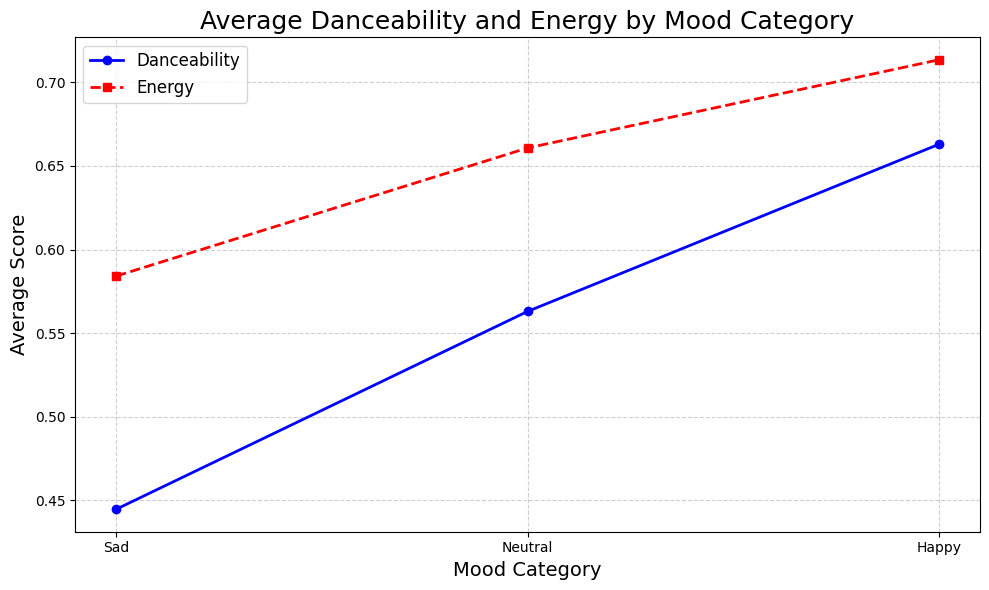

In [77]:
df_grouped_mood = df_gold.groupby('mood_category')[['danceability', 'energy']].mean().reset_index()

# Ensure the mood categories are ordered correctly
mood_order = ['Sad', 'Neutral', 'Happy']
df_grouped_mood['mood_category'] = pd.Categorical(df_grouped_mood['mood_category'], categories=mood_order, ordered=True)
df_grouped_mood = df_grouped_mood.sort_values('mood_category')

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(df_grouped_mood['mood_category'], df_grouped_mood['danceability'], label='Danceability', color='blue', marker='o', linestyle='-', linewidth=2)
plt.plot(df_grouped_mood['mood_category'], df_grouped_mood['energy'], label='Energy', color='red', marker='s', linestyle='--', linewidth=2)
plt.title('Average Danceability and Energy by Mood Category', fontsize=18)
plt.xlabel('Mood Category', fontsize=14)
plt.ylabel('Average Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Output: This line plot visually conveys how different moods affect the song's energy and danceability levels.
The blue line represents the average danceability, while the red dashed line represents the average energy. Both danceability and energy increase as the mood progresses from Sad to Happy, indicating a clear relationship between the mood and these audio features.

/var/folders/68/1zyb25f55zb975yrb5wxp8wr0000gn/T/ipykernel_3326/488091421.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped_tempo = df_gold.groupby('tempo_bin')['valence'].mean().reset_index()


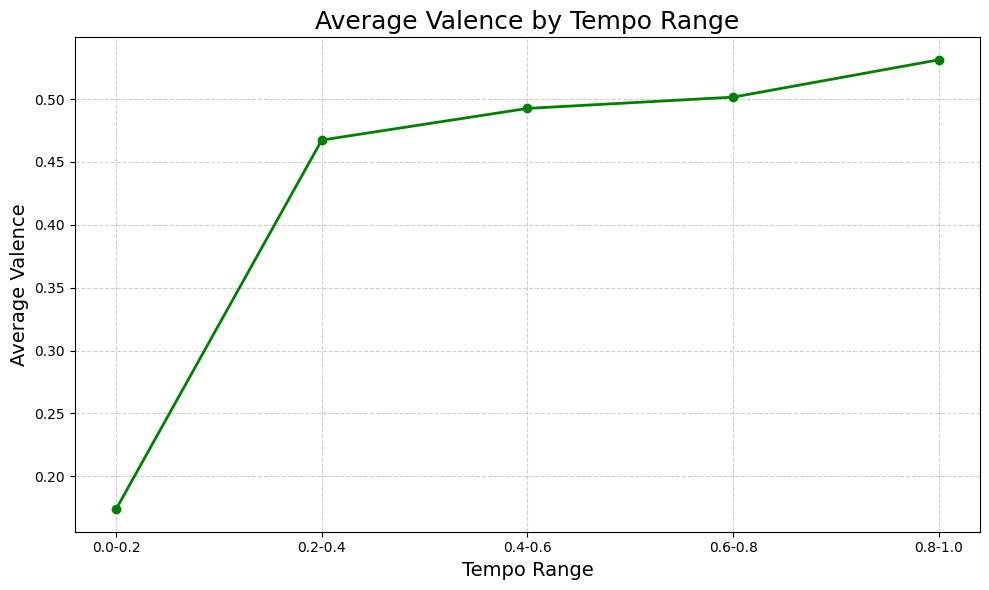

In [74]:
#Plot 2:
tempo_bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
tempo_labels = ['0.0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']

df_gold['tempo_bin'] = pd.cut(df_gold['tempo'], bins=tempo_bins, labels=tempo_labels, include_lowest=True)

df_grouped_tempo = df_gold.groupby('tempo_bin')['valence'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_grouped_tempo['tempo_bin'], df_grouped_tempo['valence'], marker='o', color='green', linestyle='-', linewidth=2)
plt.title('Average Valence by Tempo Range', fontsize=18)
plt.xlabel('Tempo Range', fontsize=14)
plt.ylabel('Average Valence', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Output: This line plot demonstrates how valence (emotional positivity) changes across different tempo ranges.
It shows that as the tempo increases, the average valence also tends to rise, indicating that faster songs are generally associated with more positive emotions. 

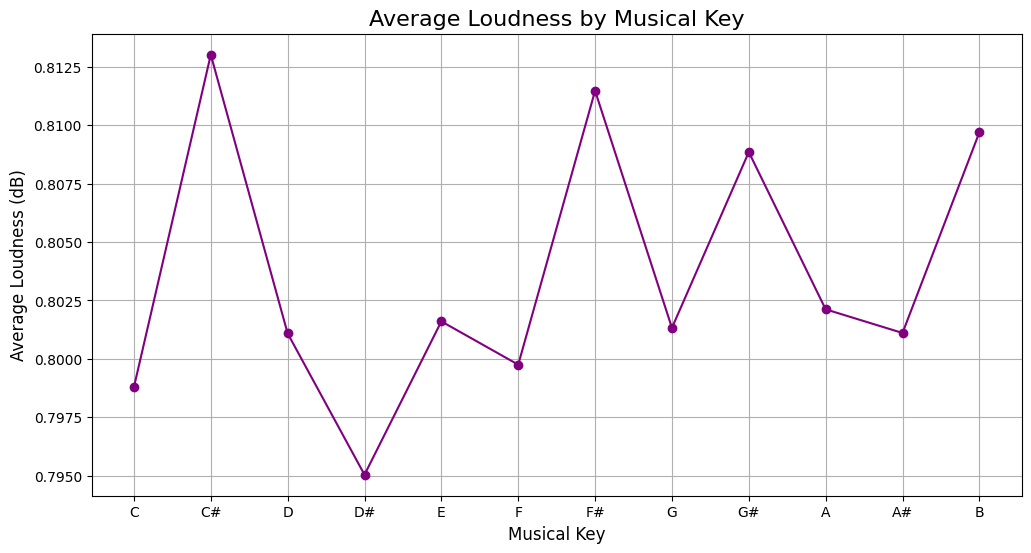

In [78]:
# Plot 3:
key_labels = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

df_gold['key_numeric'] = pd.to_numeric(df_gold['key'], errors='coerce')

df_gold['key_label'] = df_gold['key_numeric'].apply(
    lambda x: key_labels[int(x)] if pd.notnull(x) and int(x) in range(12) else 'Unknown'
)

df_grouped_key = df_gold.groupby('key_label')['loudness'].mean().reset_index()
df_grouped_key = df_grouped_key[df_grouped_key['key_label'] != 'Unknown']
df_grouped_key['key_order'] = df_grouped_key['key_label'].apply(lambda x: key_labels.index(x))
df_grouped_key = df_grouped_key.sort_values('key_order')

plt.figure(figsize=(12, 6))
plt.plot(df_grouped_key['key_label'], df_grouped_key['loudness'], marker='o', color='purple')
plt.title('Average Loudness by Musical Key', fontsize=16)
plt.xlabel('Musical Key', fontsize=12)
plt.ylabel('Average Loudness (dB)', fontsize=12)
plt.grid(True)
plt.show()

#### Output: This line plot visualizes the average loudness of songs based on their musical key. 
We observe fluctuations in loudness across the different keys, with some keys like D# having notably higher average loudness, while others like D and A have lower average values.

# 2. Bar Charts
We will create 3 bar charts to highlight interesting statistics:

Bar Chart 1: Displays the top 10 artists by the number of songs. This chart gives a quick view of which artists have the most songs in the dataset.

Bar Chart 2: Shows the average danceability by mood category. It compares how danceable songs are across different emotional states (Happy, Neutral, and Sad).

Bar Chart 3: Illustrates the number of songs for each mood category (Happy, Neutral, and Sad), showing the distribution of songs based on their overall mood.

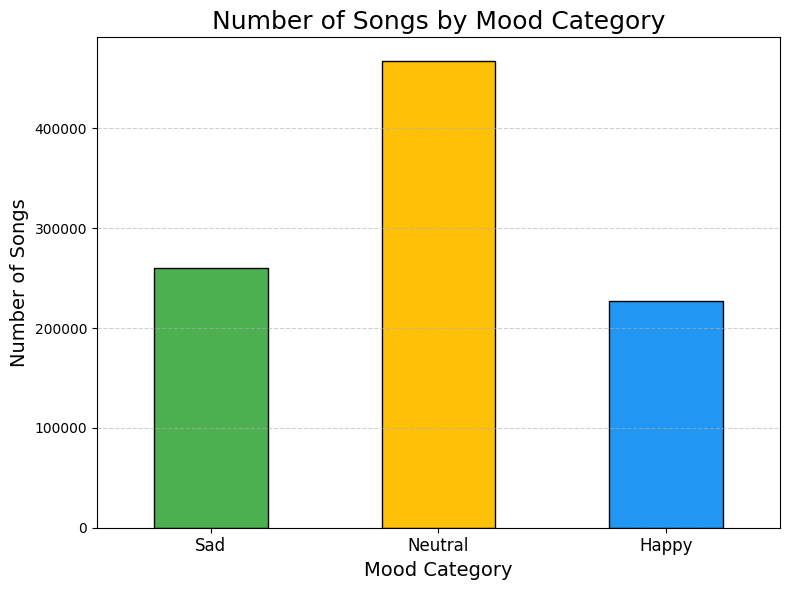

In [79]:
#Plot 1
mood_counts = df_gold['mood_category'].value_counts().reindex(mood_order)

# Bar chart
plt.figure(figsize=(8, 6))
mood_counts.plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3'], edgecolor='black')
plt.title('Number of Songs by Mood Category', fontsize=18)
plt.xlabel('Mood Category', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Output: This bar chart presents the number of songs in each mood category (Sad, Neutral, Happy)
It clearly shows that the Neutral mood category has the highest number of songs, followed by Sad and Happy.

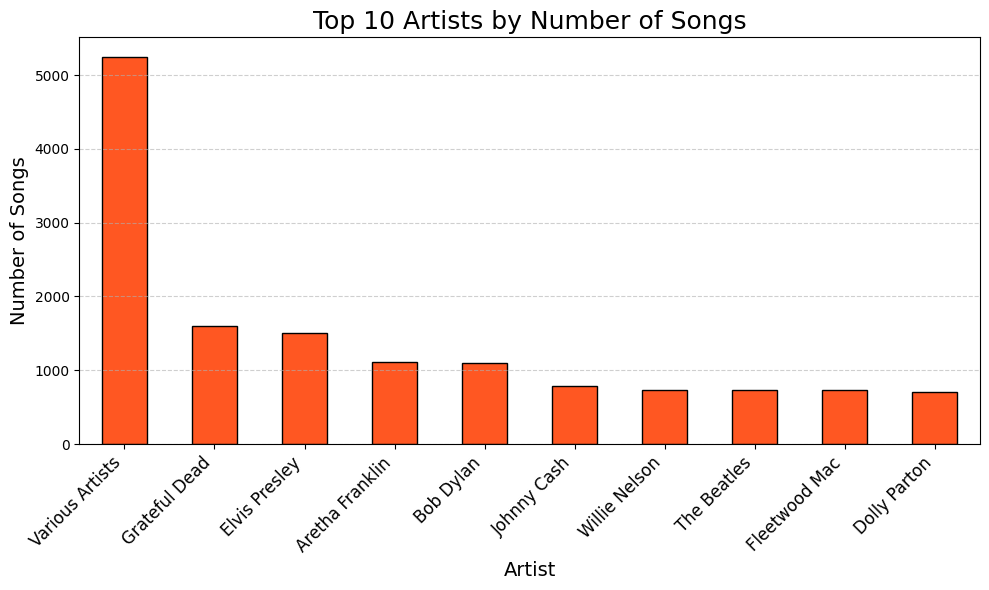

In [80]:
# Plot 2:
df_non_empty_artists = df_gold[df_gold['artists'].notna() & (df_gold['artists'].str.strip() != '')]

# Count the number of songs per artist and get the top 10
artist_counts = df_non_empty_artists['artists'].value_counts().head(10)

# Bar chart
plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar', color='#FF5722', edgecolor='black')
plt.title('Top 10 Artists by Number of Songs', fontsize=18)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Output: This bar chart displays the top 10 artists based on the number of songs in the dataset.
We see well-known artists like Grateful Dead, Elvis Presley, and Aretha Franklin are on top 10.

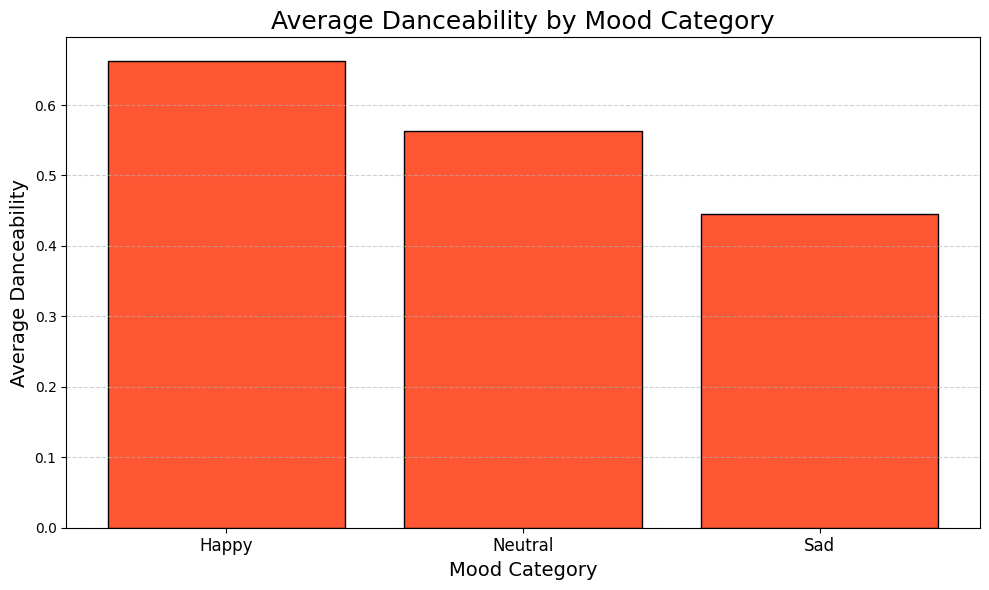

In [81]:
#Plot 3:
df_grouped_mood_danceability = df_gold.groupby('mood_category')['danceability'].mean().reset_index()

# Bar chart for average danceability by mood category
plt.figure(figsize=(10, 6))
plt.bar(df_grouped_mood_danceability['mood_category'], df_grouped_mood_danceability['danceability'], color='#FF5733', edgecolor='black')

# Adding titles and labels
plt.title('Average Danceability by Mood Category', fontsize=18)
plt.xlabel('Mood Category', fontsize=14)
plt.ylabel('Average Danceability', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()

#### Output: This bar chart shows the average danceability for different mood categories
It shows that songs categorized as "Happy" tend to have the highest average danceability, followed by "Neutral" and "Sad" categories.

# 3. Pie Plots
We will now present 3 pie charts to visualize categorical distributions:

Pie Chart 1: Depicts the distribution of songs by mood category. This pie chart helps to easily see the proportion of songs that are categorized as Sad, Neutral, or Happy.

Pie Chart 2: Illustrates the ratio between Party Tracks and Non-Party Tracks. 

Pie Chart 3: Visualizes the distribution of songs by energy level (High Energy vs Low Energy), showing the proportion of songs that are energetic compared to those with a lower energy level.

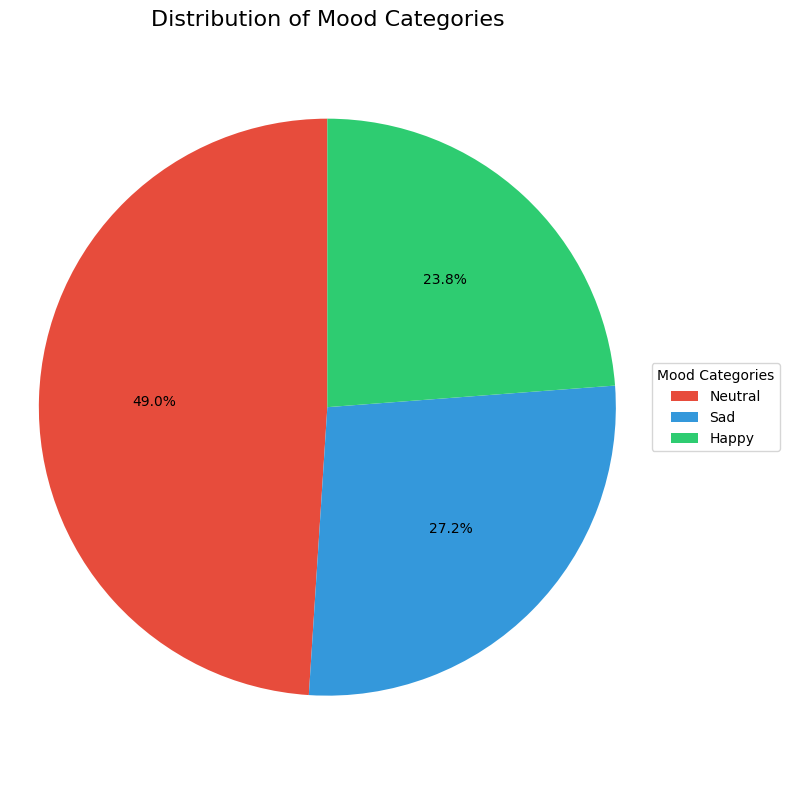

In [82]:
# Plot 1:
mood_category_counts = df_gold['mood_category'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    mood_category_counts, 
    autopct='%1.1f%%', 
    colors=['#E74C3C', '#3498DB', '#2ECC71'],  
    startangle=90
)

plt.title('Distribution of Mood Categories', fontsize=16)
plt.legend(wedges, mood_category_counts.index, title="Mood Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Output:The pie chart shows the distribution of mood categories across the dataset.
The dominant category is "Neutral," followed by "Sad" and "Happy," as shown by the larger red section.

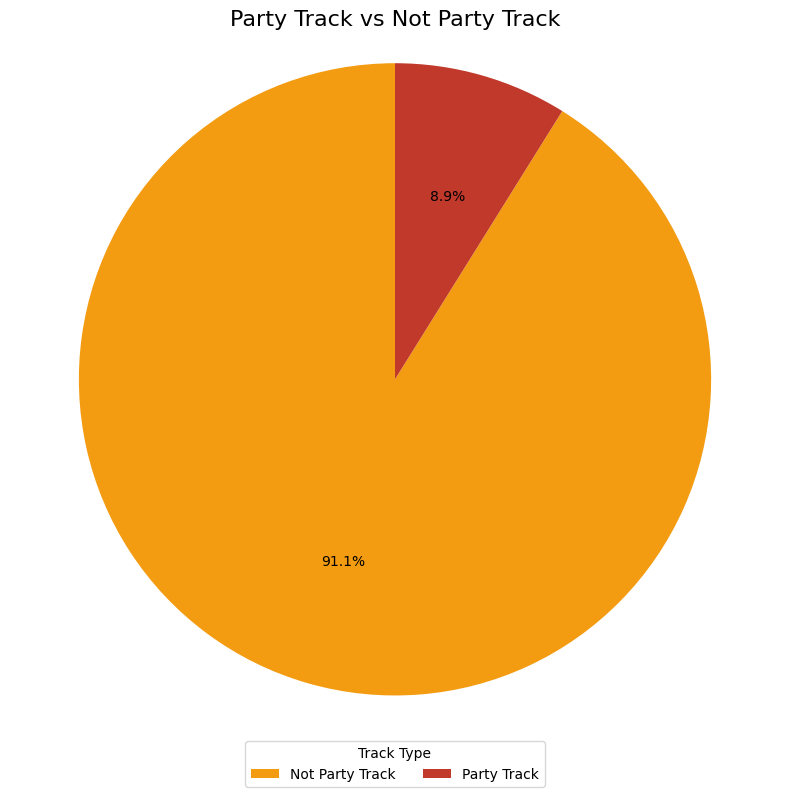

In [61]:
Plot 1:
party_track_counts = df_gold['party_track'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    party_track_counts, 
    autopct='%1.1f%%', 
    colors=['#F39C12', '#C0392B'],  
    startangle=90
)
plt.title('Party Track vs Not Party Track', fontsize=16)
plt.legend(wedges, party_track_counts.index, title="Track Type", loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.axis('equal')  
plt.tight_layout()
plt.show()

#### Output: This pie chart shows the distribution of party tracks versus non-party tracks in the dataset. 
A large portion of the tracks are labeled as "Not Party Track" (91.1%), while a smaller portion is categorized as "Party Track" (8.9%).

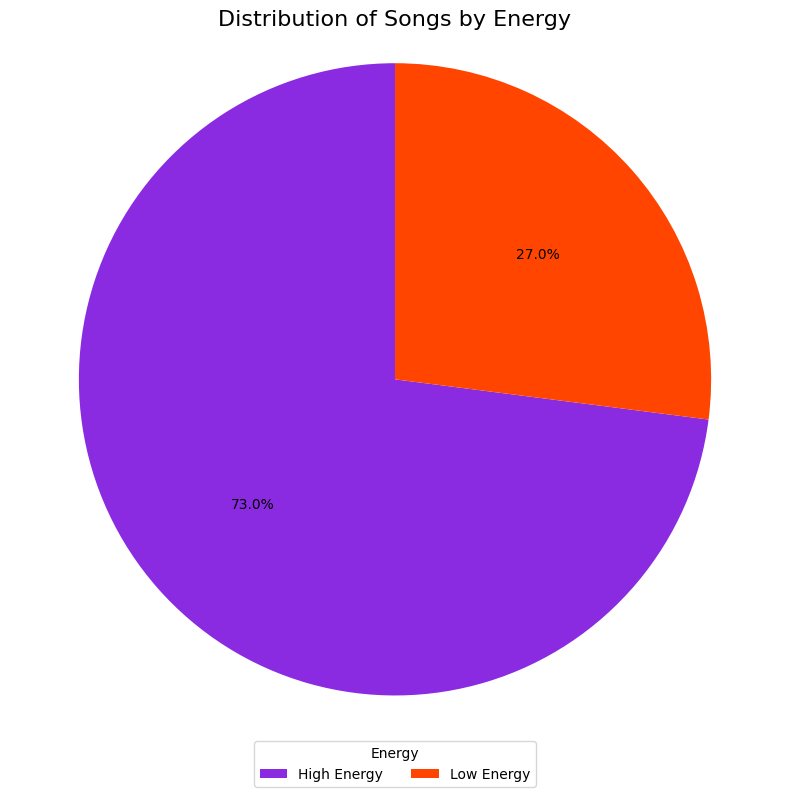

In [87]:
df_gold['energy_category'] = pd.cut(
    df_gold['energy'], 
    bins=[0, 0.5, 1], 
    labels=['Low Energy', 'High Energy']
)

# Count the number of songs in each energy category
energy_counts = df_gold['energy_category'].value_counts()

plt.figure(figsize=(8, 8))
# Create pie chart
wedges, texts, autotexts = plt.pie(
    energy_counts, 
    autopct='%1.1f%%', 
    colors=['#8A2BE2', '#FF4500'],  # Blue violet and orange red colors
    startangle=90
)

# Add title and legend
plt.title('Distribution of Songs by Energy', fontsize=16)
plt.legend(wedges, energy_counts.index, title="Energy", loc="lower center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.axis('equal')  # Ensures the pie chart is a circle.
plt.tight_layout()
plt.show()


# Other Plots
We will create the following 3 additional creative plots:

Song Duration Distribution Histogram: This histogram shows the distribution of song lengths (in minutes), 

Ridge Plot for Valence by Mood Category: This plot visualizes how the valence (positivity) of songs varies by mood categories (Sad, Neutral, Happy).

Correlation Heatmap Between Audio Features: This heatmap shows the strength of correlations between different audio features 

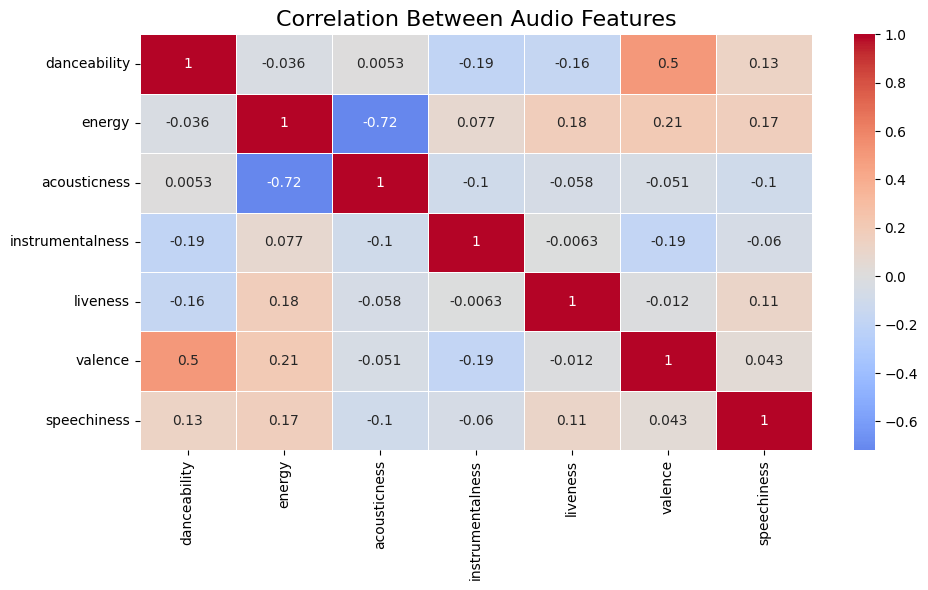

In [68]:
audio_features = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'speechiness']

# Calculate the correlation matrix
corr_matrix = df_gold[audio_features].corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, center=0)

# Add title
plt.title('Correlation Between Audio Features', fontsize=16)
plt.tight_layout()
plt.show()

- Highest Positive Correlation: Danceability and Valence (0.50), meaning more danceable songs tend to have higher positivity.
- Highest Negative Correlation: Energy and Acousticness (-0.72), meaning energetic songs tend to be less acoustic.
- Weakest Correlation: Liveness and Valence (-0.012), showing little to no relationship between the "live" feel of a track and its mood.

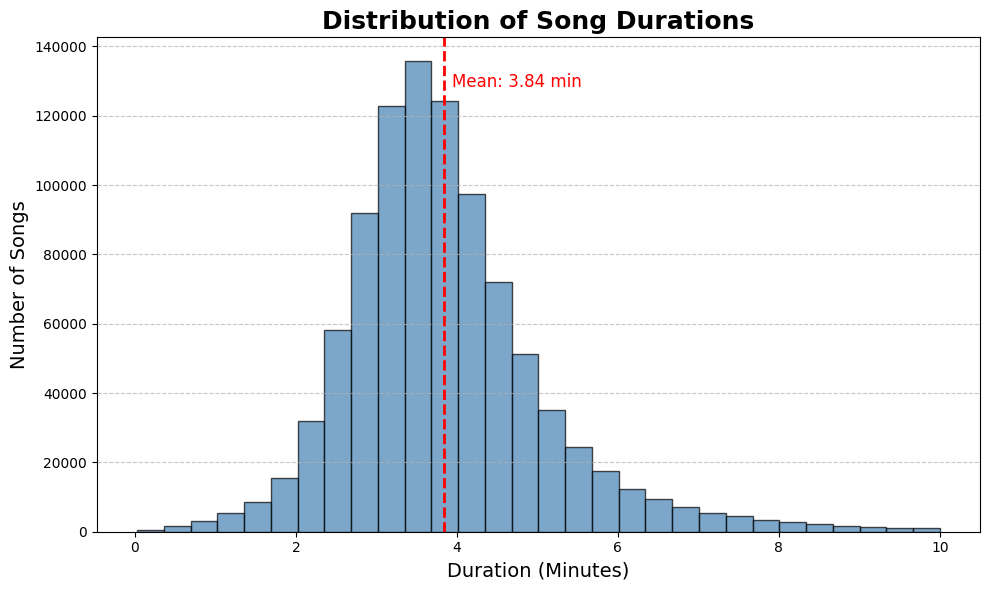

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df_gold[df_gold['duration_minutes'] < 10]['duration_minutes'], bins=30, color='#4682B4', edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Song Durations', fontsize=18, fontweight='bold')
plt.xlabel('Duration (Minutes)', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_duration_under_10 = df_gold[df_gold['duration_minutes'] < 10]['duration_minutes'].mean()
plt.axvline(mean_duration_under_10, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_duration_under_10 + 0.1, plt.ylim()[1] * 0.9, f'Mean: {mean_duration_under_10:.2f} min', color='red', fontsize=12)

# Tight layout to ensure proper spacing
plt.tight_layout()
plt.show()

#### Output:
This plot shows that most songs fall within a typical pop song length of around 3-5 minutes, with fewer very short or very long tracks.

/var/folders/68/1zyb25f55zb975yrb5wxp8wr0000gn/T/ipykernel_3326/2612286662.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/68/1zyb25f55zb975yrb5wxp8wr0000gn/T/ipykernel_3326/2612286662.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/68/1zyb25f55zb975yrb5wxp8wr0000gn/T/ipykernel_3326/2612286662.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


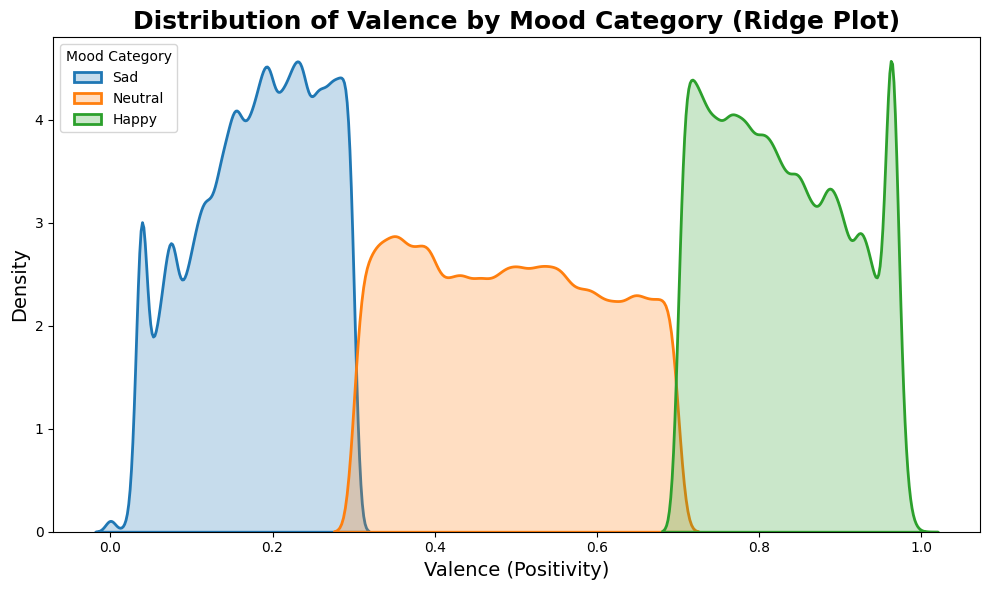

In [73]:
plt.figure(figsize=(10, 6))
for mood in ['Sad', 'Neutral', 'Happy']:
    sns.kdeplot(
        data=df_gold[df_gold['mood_category'] == mood]['valence'], 
        shade=True, label=mood, linewidth=2
    )
plt.title('Distribution of Valence by Mood Category (Ridge Plot)', fontsize=18, fontweight='bold')
plt.xlabel('Valence (Positivity)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title="Mood Category", loc='upper left')

plt.tight_layout()
plt.show()

#### Output:
The plot highlights the clear separation between mood categories, with Sad songs concentrated around lower valence values, Neutral songs spread in the middle, and Happy songs clustering around higher valence values.